np.random.rand(d0,d1, ... )
Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

np.random.randn(d0,d1, ... )
Return a sample (or samples) from the "standard normal" distribution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100,1)
e = np.random.randn(100,1)
y = 4 + 3 * X + e

(0.0, 2.0, 0.0, 15.0)

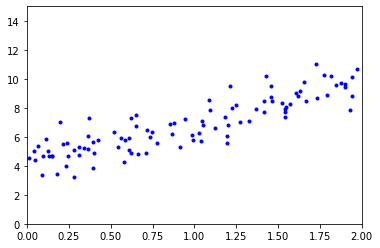

In [2]:
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

절편추가

In [3]:
X_b =np.c_[np.ones_like(X),X]

정규방정식

In [4]:
theta = np.linalg.inv( X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta.shape

(2, 1)

In [5]:
X_ = np.array([[0], [2]])
X_new = np.c_[np.ones_like(X_),X_]
X_new.shape

(2, 2)

행렬 곱 
X = (m * n) ; m 개의 샘플과 n개의 차원(특성) 행렬 

W = (n * 1) ; 가중치 열 벡터 

X * W = (m * 1) 


X 가 열 벡터 일 때

X = (n * 1) 

W = (n * 1)

X 와 W 의 점곱은 W^T * X (1*1)로 표현한다

array([[4.21509616],
       [9.75532293]])

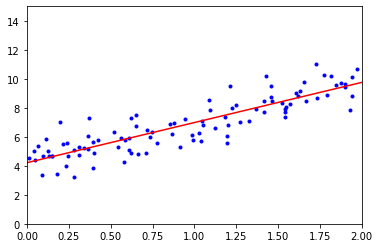

In [6]:
y_pred = X_new.dot(theta)
plt.plot(X,y,"b.")
plt.plot(X_,y_pred,"r")
plt.axis([0, 2, 0, 15])
y_pred

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

$$
E(\theta) & = \frac{1}{2}(y - X\theta)^T(y - X\theta) 
$$

In [8]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.rand(2,1)

for iter in range( n_iter ):
    theta = theta - eta * (2/m) *  X_b.T.dot( X_b.dot(theta) - y)

theta

array([[4.21509616],
       [2.77011339]])

In [9]:
def plot_gradient_descent(X : np.array, y : np.array, 
                          theta : float = None  ,n_iterator  : int = 1000, 
                          learning_rate : float = 0.1):
    """_summary_

    Args:
        X (np.array): X
        y (np.array): y
        theta (float, optional): 가중치 None이면 임의로 초기화. Defaults to None.
        n_iterator (int, optional): 반복횟수. Defaults to 1000.
        learning_rate (float, optional): 학습률. Defaults to 0.1.
    """
    
    m = X.shape[0]
    n_iterator = n_iterator
    theta_path_batch = []
    
    
    if theta == None:
        theta = np.random.rand(2,1)
    
    theta_path_batch.append(theta)
    plt.plot(X, y, "b.")
    
    X_new =  np.array([[0], [2]])
    X_new_b = np.c_[np.ones_like(X_new),X_new]
    y_new = X_new_b.dot(theta)
    # 처음 theta에 대한 직선 그리기 
    plt.plot(X_new_b,y_new,"r--")
    
    X_b =np.c_[np.ones_like(X),X]
    
    for iter in range( n_iter ):
        theta = theta - learning_rate * (2/m) *  X_b.T.dot( X_b.dot(theta) - y)
        theta_path_batch.append(theta)
        if iter < 10:
            y_pred =  X_new_b.dot(theta)
            plt.plot(X_new,y_pred,"b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(learning_rate), fontsize=16)
         
    
    

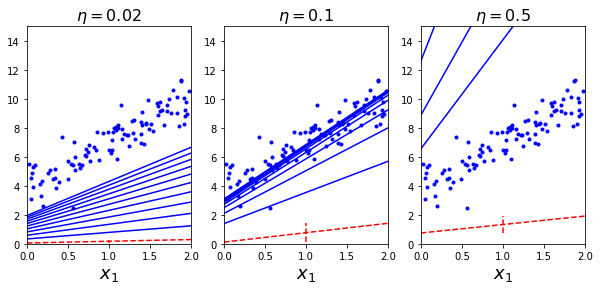

In [10]:
X = 2 * np.random.rand(100,1)
e = np.random.randn(100,1)
y = 4 + 3 * X + e

plt.figure(figsize=(10,4))

plt.subplot(131); plot_gradient_descent(X,y,learning_rate=0.02)

plt.subplot(132); plot_gradient_descent(X,y,learning_rate=0.1)

plt.subplot(133); plot_gradient_descent(X,y,learning_rate=0.5)

plt.show()


### 4.2.2 확률적 경사 하강법

샘플 갯수만큼 반복하며 한 반복 셋트를 epoch라 한다.
epoch가 하이퍼파라미터

학습 스케쥴러 t0,t1 하이퍼파라미터

$$
X^T\mathbf{y} = 123 
$$

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터
theta_path_sgd = []

eta = 0.02
m = X.shape[0]
theta = np.random.rand(2,1)
theta_path_sgd.append(theta)

X_b =np.c_[np.ones_like(X),X]



def learning_schedule(t):
    return t0 / (t + t1)


for epoch in range(n_epochs):
    for i in range(m):
        
        random_idx = np.random.randint(0,m)
        xi = X_b[random_idx : random_idx + 1] 
        yi = y[random_idx : random_idx + 1]
        gradient = 2 *  xi.T.dot( xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradient
        
        theta_path_sgd.append(theta)

theta
        

array([[3.89574748],
       [3.14142936]])

사이킷런 라이브러리 _ sgd

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93125672]), array([3.16918173]))

### 4.2.3 미니배치 경사 하강법
batch + sgd 

임의의 작은 샘플 세트에 대하여 gradient 계산

GPU를 사용하여 성능 향상 : 어떻게 하는 지 모름 

sgd보다 최솟값에 더 가까이 도달

하지만 지역 최솟값에서 빠져나오기 힘들 수 있음

배치 경사는 최소값에 도달 하지만 시간이 많이 소요 됨

미니배치와 확률적 경사 하강도 적절한 학습 스케쥴에서 최소값에 도달

In [14]:
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터
theta_path_mini = []
minibatch_size = 20
n_iterations = 50
m = X.shape[0]


theta = np.random.rand(2,1)
theta_path_mini.append(theta)

X_b =np.c_[np.ones_like(X),X]


def learning_schedule(t):
    return t0 / (t + t1)


for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    t = 0
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i + minibatch_size]
        yi = y_shuffled[i : i + minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mini.append(theta)
    
theta

array([[3.87454337],
       [3.09036707]])

In [15]:
theta_path_mini = np.array(theta_path_mini)
theta_path_sgd = np.array(theta_path_sgd)

(2.5, 4.5, 2.3, 4.9)

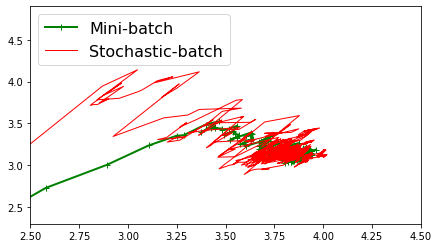

In [16]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_mini[:, 0], theta_path_mini[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r", linewidth=1, label="Stochastic-batch")
plt.legend(loc="upper left", fontsize=16)
plt.axis([2.5, 4.5, 2.3, 4.9])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)



(-3.0, 3.0, 0.0, 10.0)

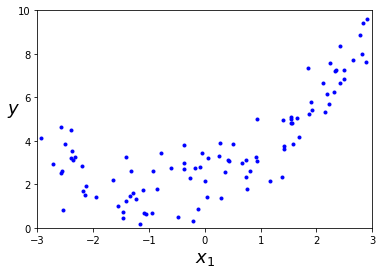

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

In [20]:
X_poly[0]

array([2.9047133 , 8.43735937])

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0354909]), array([[0.90534659, 0.49812305]]))

In [22]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.rand(2,1)

for iter in range( n_iter ):
    theta = theta - eta * (2/m) *  X_poly.T.dot( X_poly.dot(theta) - y)

theta

array([[-4.49291905e+300],
       [-7.43966593e+301]])

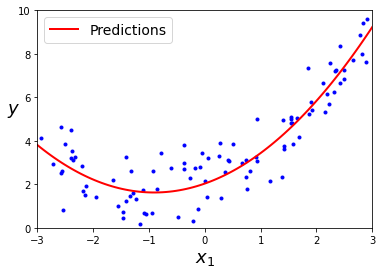

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

(-3.0, 3.0, 0.0, 10.0)

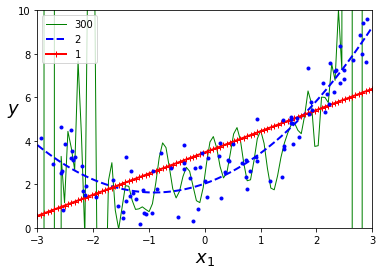

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#차수 300 2 1 에 대한 시각화 
poly_style = [ ("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1) ]

for style , width , degree in (poly_style):
    poly_feature = PolynomialFeatures(degree=degree,include_bias=False)
    std_scale = StandardScaler()
    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ('poly_features',poly_feature),
        ('std_scaler',std_scale),
        ('lin_reg',lin_reg),
    ])
    poly_reg.fit(X,y)
    y_newbig = poly_reg.predict(X_new)
    plt.plot(X_new,y_newbig,style,label = str(degree),linewidth = width )


plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
     


In [26]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [29]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])



#### Ridge Regulation

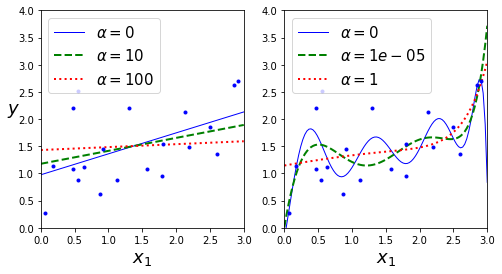

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

#### Lasso Regulation

c:\Users\outof\Anaconda3\envs\py10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


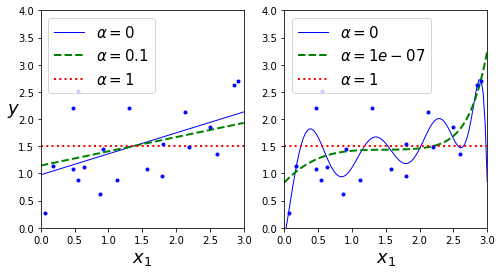

In [28]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

조기종료

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [34]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [37]:

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

best_epoch , minimum_val_error


(239, 1.3513110512453863)

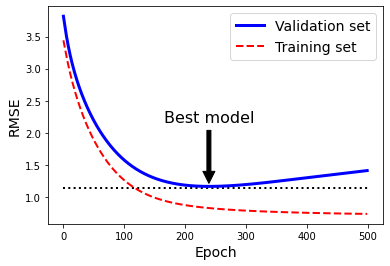

In [36]:
from sklearn.metrics import mean_squared_error

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [38]:
best_epoch , best_val_rmse

(239, 1.1324590535779686)